In [1]:
library(circlize)

# See the link for more info
# https://jokergoo.github.io/circlize_book/book/the-chorddiagram-function.html#orders-of-links

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [230]:
mat <- scan('dirComm_connect_matrix.txt')
mat <- matrix(mat, ncol = 7, nrow=7, byrow = TRUE)

rownames(mat) = paste0("DC", 1:(ncol(mat)))
colnames(mat) = paste0("DC", 1:(ncol(mat)))


In [231]:
mat

,DC1,DC2,DC3,DC4,DC5,DC6,DC7
DC1,0,2071,2507,2859,606,189,45
DC2,3088,0,1766,875,520,165,0
DC3,3810,2532,0,957,622,447,11
DC4,3359,721,531,0,11,872,1
DC5,1373,199,853,199,0,15,0
DC6,375,373,265,1530,21,0,0
DC7,23,2,4,0,0,0,0


In [2]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=10, repr.plot.height=10)

In [3]:
library("RColorBrewer")
# tab10 = c('#1f77b4', '#ff7f0e', '#2ca02c', 
#'#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf')

In [234]:
# zindex -  it improves the visualization to put wide links more
# forward and to put small links more backward in the plot.

# Argument directional is used to illustrate such direction on the plot. directional with value 
# 1 means the direction is from rows to columns (or from the first column to the second column 
# for the adjacency list)

# scale=TRUE for percent wise depiction

pdf("dirComm_connect_chordPlot.pdf",
    #res=600,
    bg="white",width=8, height=8
    )


#par(cex=2.5)
circos.par(gap.after = rep(5, ncol(mat)))
#color_set = brewer.pal(n = ncol(mat), name = "Set1")
color_set = c('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
             '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf')[1:nrow(mat)]

#c('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b')

chordDiagram(mat, grid.col = color_set, transparency=0.2, link.zindex = rank(mat), 
             directional=1,direction.type = c("diffHeight", "arrows"), link.arr.type = "big.arrow",
             diffHeight = mm_h(3), 
              scale=TRUE, annotationTrack = "grid", preAllocateTracks = 1,)
            #direction.type = "arrows", link.arr.length = 0.2)
            #annotationTrack =  c("name", "grid")    
            #link.lwd = 1, link.lty = 1, link.border = 1, 
             
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), 
                ylim[1] + .1, 
                sector.name, 
                facing = "inside",#"clockwise", 
                niceFacing = TRUE, 
                adj = c(0.5, -0.8), 
                cex=1)#col=grid.col[sector.name],
    circos.axis(h = "top", 
                labels.cex = 1, 
                major.tick.length = 0.3, 
                sector.index = sector.name, 
                track.index = 2)
}, bg.border = NA)

dev.off()

png 
  2

In [233]:
circos.clear()

# Undirected communities

In [227]:
mat <- scan('undirComm_connect_matrix.txt')
mat <- matrix(mat, ncol = 8, nrow=8, byrow = TRUE)
rownames(mat) = paste0("UC", 1:(nrow(mat)))
colnames(mat) = paste0("UC", 1:(ncol(mat)))



In [228]:
circos.clear()

In [229]:
# zindex -  it improves the visualization to put wide links more
# forward and to put small links more backward in the plot.

# Argument directional is used to illustrate such direction on the plot. directional with value 
# 1 means the direction is from rows to columns (or from the first column to the second column 
# for the adjacency list)

# scale=TRUE for percent wise depiction

pdf("undirComm_connect_chordPlot.pdf",
    #res=600,
    bg="white",width=8, height=8
    )


circos.par(gap.after = rep(5, ncol(mat)))
#color_set = brewer.pal(n = ncol(mat), name = "Set1")
color_set = c('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
             '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf')[1:nrow(mat)]

min.value = min(mat[mat>0])
max.value = max(mat[mat>0])

col_fun = colorRamp2(c(min.value, (min.value+max.value)/2, max.value), c("red", "white", "green"))

chordDiagram(mat, grid.col = color_set, col = col_fun, transparency=0.1, symmetric=TRUE, 
             link.lwd = 1, link.lty = 1, link.border = 1, 
            scale=TRUE, annotationTrack = "grid", preAllocateTracks = 1)


circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), 
                ylim[1] + .1, 
                sector.name, 
                facing = "inside",#"clockwise", 
                niceFacing = TRUE, 
                adj = c(0.5, -0.8), 
                 cex=1)#col=grid.col[sector.name],
    circos.axis(h = "top", 
                labels.cex = 1, 
                major.tick.length = 0.3, 
                sector.index = sector.name, 
                track.index = 2)
}, bg.border = NA)

dev.off()

png 
  2

In [218]:
mat

,UC1,UC2,UC3,UC4,UC5,UC6,UC7,UC8
UC1,0,9102,7122,5050,10550,5370,1054,182
UC2,9102,0,4860,4443,2410,3289,1311,45
UC3,7122,4860,0,1764,1809,580,193,4
UC4,5050,4443,1764,0,1936,2797,832,9
UC5,10550,2410,1809,1936,0,1536,4982,0
UC6,5370,3289,580,2797,1536,0,533,2
UC7,1054,1311,193,832,4982,533,0,0
UC8,182,45,4,9,0,2,0,0


# Sankey like plot

In [126]:
mat <- scan("undir_dir_commMatrix.txt")
mat <- matrix(mat, ncol = 8, nrow=7, byrow = TRUE)
rownames(mat) = paste0("DC", 1:(nrow(mat)))
colnames(mat) = paste0("UC", 1:(ncol(mat)))#c('UC1', 'UC4', 'UC2', 'UC5', 'UC3', 'UC6', 'UC7', 'UC8')


mat<-t(mat)

In [131]:
mat

,DC1,DC2,DC3,DC4,DC5,DC6,DC7
UC1,639,19,9,8,23,0,0
UC2,21,9,556,0,4,1,0
UC3,219,2,30,1,303,0,1
UC4,15,330,10,2,7,2,0
UC5,23,2,2,296,0,3,0
UC6,6,263,8,2,2,0,0
UC7,0,1,2,18,0,228,0
UC8,4,0,7,0,0,0,26


In [180]:
circos.clear()

In [182]:
#color_set1 = brewer.pal(n = nrow(mat), name = "Set1")
pdf("UC_to_DC_chordPlot.pdf",
#    #res=600,
    bg="white",width=8, height=8
    )

color_set2 = c( '#1f77b4',
               '#d62728',
               '#ff7f0e',
               '#9467bd', 
               '#2ca02c',
               '#e377c2',
               '#7f7f7f')#,                
               #'#7f7f7f')

color_set1 = c('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f')

grid.col<-c(setNames(color_set1, rownames(mat)), setNames(color_set2, colnames(mat)))


par(cex=1.7)


chordDiagram(mat, big.gap=40, grid.col = grid.col,
             transparency=0.2, link.zindex = rank(mat), 
             directional=1, direction.type = c("diffHeight", "arrows"), link.arr.type = "big.arrow",
             diffHeight = mm_h(4), annotationTrack = "grid", preAllocateTracks = 1, scale=FALSE) 
             

circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), 
                ylim[1] + .1, 
                sector.name, 
                facing = "inside",#"clockwise", 
                niceFacing = TRUE, 
                adj = c(0.5, -0.8),
                 cex=0.6, col=grid.col[sector.name])
    circos.axis(h = "top", 
                labels.cex = 0.5, 
                major.tick.length = 0.3, 
                sector.index = sector.name, 
                track.index = 2)
}, bg.border = NA)

#circos.clear()

dev.off()

png 
  2

# Anatomical connectivity chord plot ( Undirected )

In [90]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=14, repr.plot.height=14)

In [205]:
mat <- scan("./Undirected_anatomical_connectivity/anatomical_connectivity_matrix_undirected.txt")
mat <- matrix(mat, ncol = 12, nrow=12, byrow = TRUE)


rownames(mat) = c('Cerebellum', 'Dorsal Thalamus', 'Eminentia Talami', 'Hypothalamus', 'Medulla Oblongata',
                 'Peripheral nervous system ', 'Pretectum', 'Retina', 'Tectum_tori', 'Tegmentum', 
                 'Telencephalon', 'Ventral Thalamus')#,'w_Unassigned')


colnames(mat) = c('Cerebellum', 'Dorsal Thalamus', 'Eminentia Talami', 'Hypothalamus', 'Medulla Oblongata',
                 'Peripheral nervous system ', 'Pretectum', 'Retina', 'Tectum_tori', 'Tegmentum', 
                 'Telencephalon', 'Ventral Thalamus')#,'w_Unassigned')


In [82]:
mat

,Cerebellum,Dorsal Thalamus,Eminentia Talami,Hypothalamus,Medulla Oblongata,Peripheral nervous system,Pretectum,Retina,Tectum_tori,Tegmentum,Telencephalon,Ventral Thalamus
Cerebellum,0,428,127,476,11679,316,1995,11,494,1318,280,471
Dorsal Thalamus,428,0,329,485,4044,0,1518,74,777,673,231,644
Eminentia Talami,127,329,0,291,1407,0,408,35,453,110,877,588
Hypothalamus,476,485,291,0,8396,13,1144,49,1047,832,2061,902
Medulla Oblongata,11679,4044,1407,8396,0,1882,8719,282,10009,8903,4713,4856
Peripheral nervous system,316,0,0,13,1882,0,5,0,23,22,84,1
Pretectum,1995,1518,408,1144,8719,5,0,528,3109,2108,284,1341
Retina,11,74,35,49,282,0,528,0,1210,63,13,128
Tectum_tori,494,777,453,1047,10009,23,3109,1210,0,1255,132,1284
Tegmentum,1318,673,110,832,8903,22,2108,63,1255,0,182,701


In [86]:
# zindex -  it improves the visualization to put wide links more
# forward and to put small links more backward in the plot.

# Argument directional is used to illustrate such direction on the plot. directional with value 
# 1 means the direction is from rows to columns (or from the first column to the second column 
# for the adjacency list)

# scale=TRUE for percent wise depiction

pdf("./Undirected_anatomical_connectivity/Anatomical_connect_chordPlot_undirected.pdf",
    #res=600,
    bg="white", width=8, height=7
    )

#color_set1 = c('#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
# '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#e377c2', 
# '#f7b6d2', '#7f7f7f')#, '#c7c7c7', '#bcbd22', '#17becf')#,"grey")

color_set1 = c('#aec7e8',
 '#f57e20',
 '#fcba79',
 '#2da048',
 '#f69696',
 '#807f7f',
 '#9267ac',
 '#c5b0d5',
 '#8c574c',
 '#d77ab1',
 '#32b9cb',
 '#9dd089')

grid.col<-c(setNames(color_set1, rownames(mat)))#, setNames(color_set2, colnames(mat)))


circos.par(gap.after = rep(5, ncol(mat)))

col_fun = colorRamp2(c(min(mat), (max(mat)+min(mat))/2, max(mat)), c("red", "white", "green"))
#cor_mat = cor(mat)

chordDiagram(mat, grid.col = grid.col, col = col_fun, transparency=0.2, symmetric=TRUE, 
             link.lwd = 1, link.lty = 1, link.border = 1, 
            scale=FALSE, annotationTrack = "grid", preAllocateTracks = 1)


circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), 
                ylim[1] + .1, 
                sector.name, 
                facing = "clockwise", 
                niceFacing = TRUE, 
                adj = c(0, 0.5),
                 cex=0.8, col=grid.col[sector.name])
    circos.axis(h = "top", 
                labels.cex = 0.6, 
                major.tick.length = 0.3, 
                sector.index = sector.name, 
                track.index = 2, minor.ticks=6)
}, bg.border = NA)

dev.off()

png 
  2

In [89]:
circos.clear()

In [88]:
# medulla oblongata
sum(mat[5,1:12])

[1] 64890

In [92]:

# highlighting each region.

# scale=TRUE for percent wise depiction
for (i in 1:12)
{
    #i=2


    color_set1 = c('#aec7e8',
                     '#f57e20',
                     '#fcba79',
                     '#2da048',
                     '#f69696',
                     '#807f7f',
                     '#9267ac',
                     '#c5b0d5',
                     '#8c574c',
                     '#d77ab1',
                     '#32b9cb',
                     '#9dd089')


    # vector of colors where specified region is marked by color while remaining regions are grey.
    #color_set.highlight <- ifelse(color_set1 == color_set1[i],color_set1[i],"#00FF0010")
    #color_set.highlight

    pdf(paste("./Undirected_anatomical_connectivity/anatomical_connectivity_regionwise/",row.names(mat)[i],'.pdf'),
        #res=600,
        bg="white", width=8, height=7
        )
    
    col_mat<-matrix(rep('#00FF0010', 12*12), 12, 12)
    col_mat[1:12,i]<-color_set1[i] # replace the values in the matrix for corresponding row and column
    col_mat[i,1:12]<-color_set1[i]


    grid.col<-c(setNames(color_set1, rownames(mat)))#, setNames(color_set2, colnames(mat)))


    circos.par(gap.after = rep(5, ncol(mat)))

    
    chordDiagram(mat, grid.col=grid.col, col=col_mat, transparency=0.2, symmetric=TRUE, 
                 scale=FALSE, annotationTrack = "grid", preAllocateTracks = 1)#,link.lwd = 1, link.lty = 1, link.border = 1, 



    circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
        xlim = get.cell.meta.data("xlim")
        ylim = get.cell.meta.data("ylim")
        sector.name = get.cell.meta.data("sector.index")
        circos.text(mean(xlim), 
                    ylim[1] + .1, 
                    sector.name, 
                    facing = "clockwise", 
                    niceFacing = TRUE, 
                    adj = c(0, 0.5),
                     cex=0.8, col=grid.col[sector.name])
        circos.axis(h = "top", 
                    labels.cex = 0.6, 
                    major.tick.length = 0.3, 
                    sector.index = sector.name, 
                    track.index = 2, minor.ticks=6)
    }, bg.border = NA)

    dev.off()
    circos.clear()
}

# Anatomical connectivity chord plot Directed

In [ ]:

library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=14, repr.plot.height=14)

In [93]:
mat <- scan("./Directed_anatomical_connectivity/anatomical_connectivity_matrix_directed.txt")
mat <- matrix(mat, ncol = 12, nrow=12, byrow = TRUE)


rownames(mat) = c('Cerebellum', 'Dorsal Thalamus', 'Eminentia Talami', 'Hypothalamus', 'Medulla Oblongata',
                 'Peripheral nervous system ', 'Pretectum', 'Retina', 'Tectum tori', 'Tegmentum', 
                 'Telencephalon', 'Ventral Thalamus')#,'w_Unassigned')


colnames(mat) = c('Cerebellum', 'Dorsal Thalamus', 'Eminentia Talami', 'Hypothalamus', 'Medulla Oblongata',
                 'Peripheral nervous system ', 'Pretectum', 'Retina', 'Tectum tori', 'Tegmentum', 
                 'Telencephalon', 'Ventral Thalamus')#,'w_Unassigned')


In [94]:
mat

,Cerebellum,Dorsal Thalamus,Eminentia Talami,Hypothalamus,Medulla Oblongata,Peripheral nervous system,Pretectum,Retina,Tectum tori,Tegmentum,Telencephalon,Ventral Thalamus
Cerebellum,0,188,56,290,3754,34,570,0,208,893,109,316
Dorsal Thalamus,5,0,74,155,1173,0,312,4,191,139,24,172
Eminentia Talami,6,158,0,89,363,0,91,2,185,67,102,121
Hypothalamus,32,79,38,0,1594,1,189,1,289,210,201,223
Medulla Oblongata,2282,867,467,3471,0,210,2621,24,3420,2566,1261,2044
Peripheral nervous system,166,0,0,3,884,0,0,0,5,8,49,0
Pretectum,690,349,70,387,2431,3,0,14,583,683,78,337
Retina,0,40,25,39,45,0,408,0,684,25,10,72
Tectum tori,55,215,100,324,2575,8,904,25,0,360,26,350
Tegmentum,59,39,8,76,2141,6,145,0,180,0,4,46


In [97]:
# zindex -  it improves the visualization to put wide links more
# forward and to put small links more backward in the plot.

# Argument directional is used to illustrate such direction on the plot. directional with value 
# 1 means the direction is from rows to columns (or from the first column to the second column 
# for the adjacency list)

# scale=TRUE for percent wise depiction

#pdf("Fig4E_dirComm_connect.pdf",
#    #res=600,
#    bg="white"
#    )
pdf("./Directed_anatomical_connectivity/Anatomical_connect_chordPlot_directed.pdf",
    #res=600,
    bg="white", width=8, height=7
    )


#par(cex=2.5)
# 12 colors
color_set1 = c('#aec7e8',
                     '#f57e20',
                     '#fcba79',
                     '#2da048',
                     '#f69696',
                     '#807f7f',
                     '#9267ac',
                     '#c5b0d5',
                     '#8c574c',
                     '#d77ab1',
                     '#32b9cb',
                     '#9dd089')

grid.col<-c(setNames(color_set1, rownames(mat)))#, setNames(color_set2, colnames(mat)))

circos.par(gap.after = rep(5, ncol(mat)))

chordDiagram(mat, grid.col = color_set1, transparency=0.2,link.zindex = rank(mat), 
             directional=1,direction.type = c("diffHeight", "arrows"), link.arr.type = "big.arrow",
             diffHeight = mm_h(3), 
              scale=FALSE, annotationTrack = "grid", preAllocateTracks = 1,)
            #link.lwd = 1, link.lty = 1, link.border = 1, 
             
            #direction.type = "arrows", link.arr.length = 0.2)
            #annotationTrack =  c("name", "grid")    

circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), 
                ylim[1] + .1, 
                sector.name, 
                facing = "clockwise", 
                niceFacing = TRUE, 
                adj = c(0, 0.5),
                 cex=0.8, col=grid.col[sector.name])
    circos.axis(h = "top", 
                labels.cex = 0.6, 
                major.tick.length = 0.3, 
                sector.index = sector.name, 
                track.index = 2, minor.ticks=3)
}, bg.border = NA)

dev.off()

png 
  2

In [99]:
circos.clear()

In [100]:

# highlighting each region.

# scale=TRUE for percent wise depiction
for (i in 1:12)
{
    #i=2


    color_set1 = c('#aec7e8',
                     '#f57e20',
                     '#fcba79',
                     '#2da048',
                     '#f69696',
                     '#807f7f',
                     '#9267ac',
                     '#c5b0d5',
                     '#8c574c',
                     '#d77ab1',
                     '#32b9cb',
                     '#9dd089')


    # vector of colors where specified region is marked by color while remaining regions are grey.
    #color_set.highlight <- ifelse(color_set1 == color_set1[i],color_set1[i],"#00FF0010")
    #color_set.highlight

    pdf(paste("./Directed_anatomical_connectivity/anatomical_connectivity_regionwise/",row.names(mat)[i],'.pdf'),
        #res=600,
        bg="white", width=8, height=7
        )
    
    col_mat<-matrix(rep('#00FF0010', 12*12), 12, 12)
    col_mat[1:12,i]<-color_set1 # replace the values in the matrix for corresponding row and column
    col_mat[i,1:12]<-color_set1[i]


    grid.col<-c(setNames(color_set1, rownames(mat)))#, setNames(color_set2, colnames(mat)))


    circos.par(gap.after = rep(5, ncol(mat)))

    chordDiagram(mat, grid.col=grid.col, col=col_mat, transparency=0.2,link.zindex = rank(mat), 
                 directional=1,direction.type = c("diffHeight", "arrows"), link.arr.type = "big.arrow",
                 diffHeight = mm_h(3), 
                  scale=FALSE, annotationTrack = "grid", preAllocateTracks = 1,)
                #link.lwd = 1, link.lty = 1, link.border = 1, 
                 


    circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), 
                ylim[1] + .1, 
                sector.name, 
                facing = "clockwise", 
                niceFacing = TRUE, 
                adj = c(0, 0.5),
                 cex=0.8, col=grid.col[sector.name])
    circos.axis(h = "top", 
                labels.cex = 0.6, 
                major.tick.length = 0.3, 
                sector.index = sector.name, 
                track.index = 2, minor.ticks=3)
    }, bg.border = NA)

    dev.off()
    circos.clear()
}

# Anatomical regions - UC chord plot

In [101]:
mat <- scan("./Undirected_anatomical_connectivity/anatomRegions_UC_matrix.txt")
mat <- matrix(mat, ncol = 8, nrow=12, byrow = TRUE)

colnames(mat) = paste0("UC", 1:ncol(mat))
rownames(mat) = c('Cerebellum', 'Dorsal Thalamus', 'Eminentia Talami', 'Hypothalamus', 'Medulla Oblongata',
                 'Peripheral nervous system ', 'Pretectum', 'Retina', 'Tectum tori', 'Tegmentum', 
                 'Telencephalon', 'Ventral Thalamus')#,'w_Unassigned')


mat<-t(mat)

In [102]:
mat

,Cerebellum,Dorsal Thalamus,Eminentia Talami,Hypothalamus,Medulla Oblongata,Peripheral nervous system,Pretectum,Retina,Tectum tori,Tegmentum,Telencephalon,Ventral Thalamus
UC1,35,17,3,34,357,9,109,0,16,72,0,17
UC2,35,8,1,5,474,32,3,0,11,2,1,6
UC3,354,7,0,0,130,1,12,0,2,46,1,3
UC4,4,16,6,15,31,0,86,26,161,4,0,22
UC5,3,16,3,59,217,0,1,0,1,2,15,9
UC6,3,3,3,8,47,0,10,42,145,4,0,15
UC7,1,3,27,10,1,12,1,1,0,1,178,15
UC8,0,0,0,5,28,1,0,0,0,0,0,0


In [106]:
color_set2 = c('#aec7e8',
                     '#f57e20',
                     '#fcba79',
                     '#2da048',
                     '#f69696',
                     '#807f7f',
                     '#9267ac',
                     '#c5b0d5',
                     '#8c574c',
                     '#d77ab1',
                     '#32b9cb',
                     '#9dd089')


color_set1 = rep("grey", nrow(mat))


pdf("./Undirected_anatomical_connectivity/UC_anatomRegions_mapping_Chordplot.pdf",
    #res=600,
    bg="white", width=8, height=7
    )

grid.col<-c(setNames(color_set1, rownames(mat)), setNames(color_set2, colnames(mat)))


chordDiagram(mat, big.gap=30, grid.col = grid.col, column.col = color_set2,
             transparency=0.1, link.zindex = rank(mat), 
             directional=1, direction.type = c("diffHeight", "arrows"), link.arr.type = "big.arrow",
             diffHeight = mm_h(4), 
             annotationTrack = "grid", preAllocateTracks = 1, scale=TRUE)   
             #link.lwd = 1, link.lty = 1, link.border = 1, 
                



circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), 
                ylim[1] + .1, 
                sector.name, 
                facing = "clockwise", 
                niceFacing = TRUE, 
                adj = c(0, 0.5),
                col=grid.col[sector.name], cex=0.8)
    circos.axis(h = "top", 
                major.at = c(0,0.5,1.0),
                labels.cex = 0.6, 
                major.tick.length = 0.3, 
                sector.index = sector.name, 
                track.index = 2)
               #minor.ticks = 6)
}, bg.border = NA)

circos.clear()
dev.off()




png 
  2

# Anatomical regions - DC chord plot

In [108]:
mat <- scan("./Directed_anatomical_connectivity/anatomRegions_DC_matrix.txt")
mat <- matrix(mat, ncol = 7, nrow=12, byrow = TRUE)

colnames(mat) = paste0("DC", 1:ncol(mat))
rownames(mat) = c('Cerebellum', 'Dorsal Thalamus', 'Eminentia Talami', 'Hypothalamus', 'Medulla Oblongata',
                 'Peripheral nervous system ', 'Pretectum', 'Retina', 'Tectum tori', 'Tegmentum', 
                 'Telencephalon', 'Ventral Thalamus')#,'w_Unassigned')


mat<-t(mat)

In [109]:
mat

,Cerebellum,Dorsal Thalamus,Eminentia Talami,Hypothalamus,Medulla Oblongata,Peripheral nervous system,Pretectum,Retina,Tectum tori,Tegmentum,Telencephalon,Ventral Thalamus
DC1,107,24,4,38,463,9,100,0,22,111,2,17
DC2,8,17,11,21,80,0,91,64,295,10,0,32
DC3,55,9,2,8,468,34,5,0,14,2,2,11
DC4,3,14,7,58,203,0,0,1,2,2,24,13
DC5,261,0,0,0,45,0,25,2,1,5,0,0
DC6,1,6,21,10,1,11,1,0,0,1,167,14
DC7,0,0,0,1,23,0,0,0,0,0,0,0


In [110]:
color_set2 = c('#aec7e8',
                     '#f57e20',
                     '#fcba79',
                     '#2da048',
                     '#f69696',
                     '#807f7f',
                     '#9267ac',
                     '#c5b0d5',
                     '#8c574c',
                     '#d77ab1',
                     '#32b9cb',
                     '#9dd089')


color_set1 = rep("grey", nrow(mat))


pdf("./Directed_anatomical_connectivity/DC_anatomRegions_mapping_Chordplot.pdf",
    #res=600,
    bg="white", width=8, height=7
    )

grid.col<-c(setNames(color_set1, rownames(mat)), setNames(color_set2, colnames(mat)))


chordDiagram(mat, big.gap=30, grid.col = grid.col, column.col = color_set2,
             transparency=0.1, link.zindex = rank(mat), 
             directional=1, direction.type = c("diffHeight", "arrows"), link.arr.type = "big.arrow",
             diffHeight = mm_h(4), 
             annotationTrack = "grid", preAllocateTracks = 1, scale=TRUE)   
             #link.lwd = 1, link.lty = 1, link.border = 1, 
                



circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), 
                ylim[1] + .1, 
                sector.name, 
                facing = "clockwise", 
                niceFacing = TRUE, 
                adj = c(0, 0.5),
                col=grid.col[sector.name], cex=0.8)
    circos.axis(h = "top", 
                major.at = c(0,0.5,1.0),
                labels.cex = 0.6, 
                major.tick.length = 0.3, 
                sector.index = sector.name, 
                track.index = 2)
               #minor.ticks = 6)
}, bg.border = NA)

circos.clear()
dev.off()




png 
  2

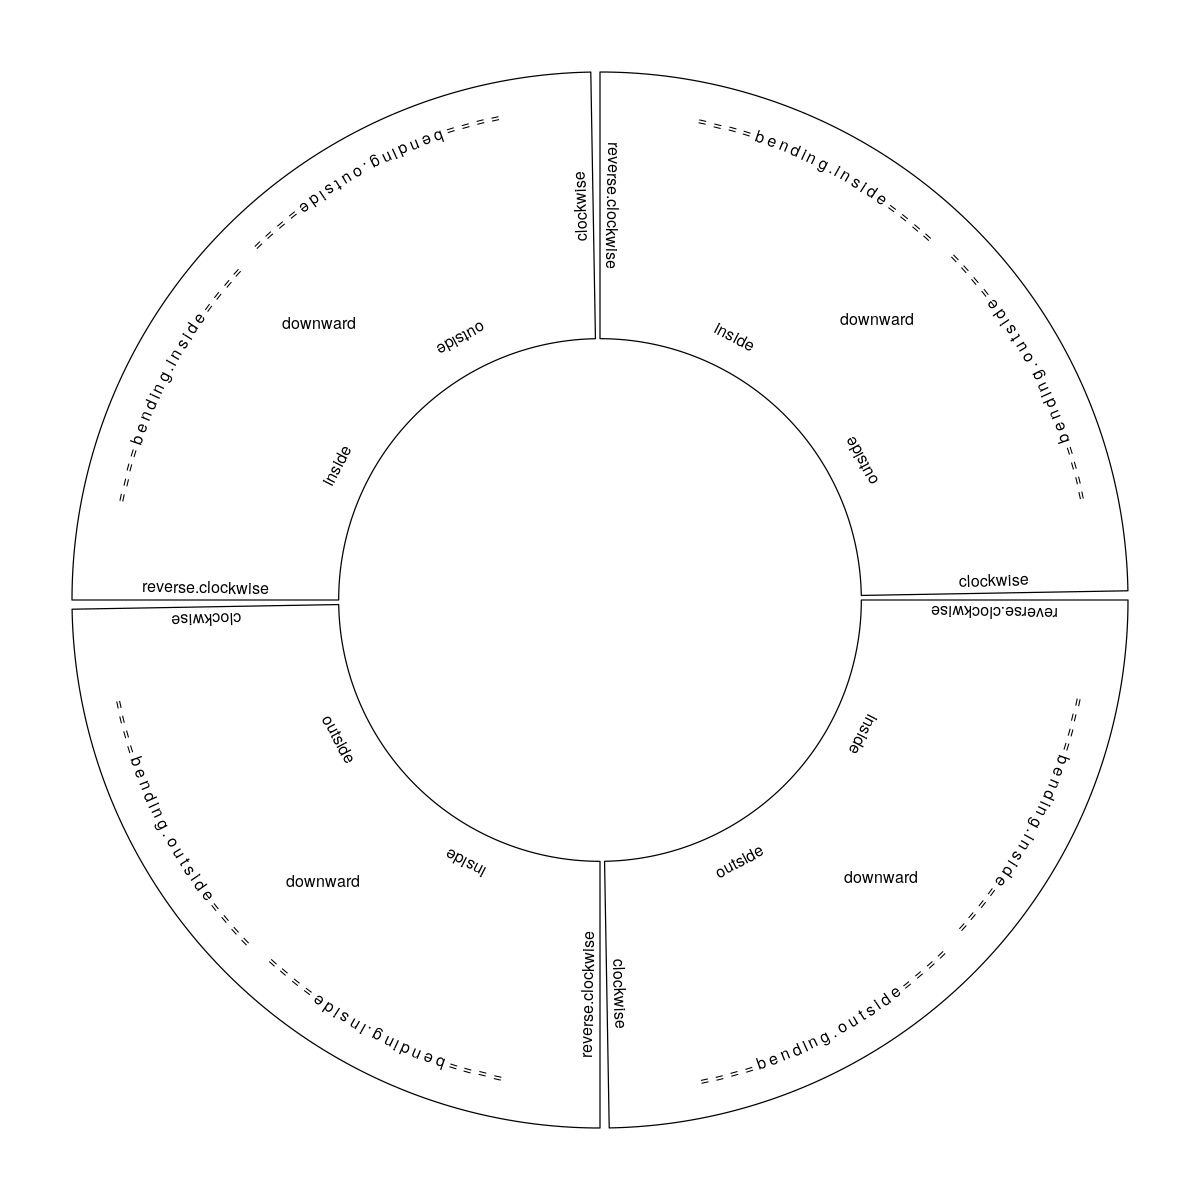

In [92]:
sectors = letters[1:4]
circos.par(points.overflow.warning = FALSE)
circos.initialize(sectors, xlim = c(0, 10))
circos.trackPlotRegion(sectors, ylim = c(0, 10),
  track.height = 0.5, panel.fun = function(x, y) {
    circos.text(3, 1, "inside", facing = "inside", cex = 0.8)
    circos.text(7, 1, "outside", facing = "outside", cex = 0.8)
    circos.text(0, 5, "reverse.clockwise", facing = "reverse.clockwise",
        adj = c(0.5, 0), cex = 0.8)
    circos.text(10, 5, "clockwise", facing = "clockwise", adj = c(0.5, 0),
        cex = 0.8)
    circos.text(5, 5, "downward", facing = "downward", cex = 0.8)
    circos.text(3, 9, "====bending.inside====", facing = "bending.inside",
        cex = 0.8)
    circos.text(7, 9, "====bending.outside====", facing = "bending.outside",
        cex = 0.8)
})
#circos.clear()